In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('mail_data.csv')

In [4]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.shape

(5572, 2)

In [12]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
df.duplicated().sum()

415

In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
df.duplicated().sum()

0

In [17]:
df.shape

(5157, 2)

In [18]:
import matplotlib.pyplot as plt

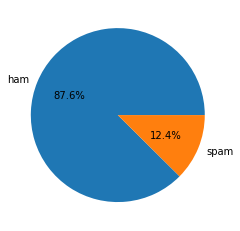

In [21]:
plt.pie(df['Category'].value_counts(), labels=['ham','spam'], autopct='%0.1f%%')
plt.show()

In [23]:
#Converting categorical values into numerical values
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [24]:
df['Category']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32

0 -> ham
1 -> spam

In [27]:
#seperating the data as text and labels
X = df['Message']
Y = df['Category']

In [28]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object


In [29]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32


In [30]:
#splitting the data into training and testing test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [31]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(4125,)
(1032,)


In [32]:
#transform the text data to feature vectors

vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [33]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object


In [34]:
print(X_train_features)

  (0, 5369)	0.21883509342500662
  (0, 4517)	0.22587930914012644
  (0, 63)	0.26444429208811887
  (0, 538)	0.26444429208811887
  (0, 1965)	0.26444429208811887
  (0, 1998)	0.26444429208811887
  (0, 280)	0.26444429208811887
  (0, 1383)	0.21036949486509857
  (0, 5067)	0.21578070171239025
  (0, 4659)	0.2590330852408272
  (0, 4309)	0.1929428920017172
  (0, 342)	0.25434568466038265
  (0, 3713)	0.13030141215662586
  (0, 79)	0.2708443913782283
  (0, 2655)	0.2786774798482469
  (0, 5397)	0.2786774798482469
  (0, 1642)	0.21434771253248103
  (1, 6790)	0.3737108143785979
  (1, 5881)	0.41809188797223235
  (1, 2150)	0.2938570766426333
  (1, 2362)	0.3845189018428952
  (1, 3027)	0.3090492626142984
  (1, 4039)	0.22059399447216574
  (1, 4731)	0.34013782824926075
  (1, 828)	0.29026761398452894
  :	:
  (4119, 4601)	0.4829455236816504
  (4120, 6509)	0.611850367948527
  (4120, 5931)	0.5339781674891657
  (4120, 3178)	0.4601574886688711
  (4120, 2103)	0.35883356797841864
  (4121, 1608)	0.5326700701171188
  (4121

In [35]:
#Model Training
model = LogisticRegression()

In [36]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [39]:
#Chceking the accuracy of the model

Y_test_prediction = model.predict(X_test_features)

accuracy = accuracy_score(Y_test, Y_test_prediction)

print("Accuracy:",accuracy*100)

Accuracy: 96.51162790697676


In [42]:
#Building a Predictive System
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = vectorizer.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Ham mail
